# Obstacles & Position

In [1]:
import numpy as np
import matplotlib.pylab as plt
import time 
%matplotlib inline
import pickle
from numpy import linalg as LA
from random import randint
from graphics import *

# Create Objects

Need to randomly select, size and position of objects.

To simplify the problem the following assumptions will be made:
<ol>
<li> horizontal flight, z = 0 </li>
<li> objects are spheres , symmetric about x, y, and z axis </li>
<li> There is a maximum range up to which object can be detected </li>
</ol>

# no overlap 

To ensure there is not overlap the distance between the center of two circles must fulfill the following requirement, R1 and R2 are the radiuses of the respective circles:
$$ D_{1,2}<R_{1} + R_{2} $$

Equally to ensure that a position of the drone does not fall within the area of a certain obstacle: 
$$ D_{1,2}<R_{1} + SF $$
where R1 is the radius of the obstacle, and SF a safety factor, margin


In [2]:

area = 10
numObj = 10
minRadius = 4
maxRadius = 6
maxDis= 10

#Safety factor for intersection between obstalces, and between positio and obstacle
SF1 = 1.5
SF2 = 1.2


In [3]:
#[num[0:2] -s_2[0:2]]

# s_x=np.array([randint(-maxDis, maxDis) for p in range(0,numObj)])
# s_y= np.array([randint(-maxDis,maxDis) for p in range(0,numObj)])
# s_z = np.array(np.zeros(numObj))
# s_r = np.array(np.random.sample(numObj)*maxRadius)
# #s_r = ([randint(minRadius,maxRadius) for p in range(0,numObj)])
# obstacles = np.column_stack([s_x, s_y, s_z, s_r])
# print(obstacles.shape)

In [4]:
s =[]# [randint(-maxDis, maxDis), randint(-maxDis, maxDis)] 
s.append(np.array([randint(-maxDis, maxDis), randint(-maxDis, maxDis),0, np.random.sample()*maxRadius]))
# for i in range(numObj):
#     print(s)

stopObj =False
i = 1
while stopObj == False: 
    #print(s)
    intersect = False
    s_2 = np.array([randint(-maxDis, maxDis), randint(-maxDis, maxDis),0, np.random.sample()*maxRadius])
    for num in s:
        #print(i)
        
        #print(s_2, num)
        #print(LA.norm([num[0:2] -s_2[0:2]]),(num[3]+s_2[3])*SF1, num, s_2)
        if LA.norm([num[0:2]-s_2[0:2]])< (num[3]+s_2[3])*SF1:
            intersect = True
            print('interesect', s_2)

    if intersect == False:
        s.append(s_2)
        i = i+1
        if i>numObj-1:
            stopObj = True
obstacle =s

5.0 8.80806079313 [ 9.          0.          0.          0.87392143] [ 4.         0.         0.         4.9981191]
interesect [ 4.         0.         0.         4.9981191]
6.0827625303 7.16064255677 [ 9.          0.          0.          0.87392143] [ 3.         -1.          0.          3.89984027]
interesect [ 3.         -1.          0.          3.89984027]
16.0 7.50759765865 [ 9.          0.          0.          0.87392143] [-7.          0.          0.          4.13114367]
12.1655250606 7.08527476602 [ 9.          0.          0.          0.87392143] [-3.          2.          0.          3.84959508]
4.472135955 11.9711081277 [-7.          0.          0.          4.13114367] [-3.          2.          0.          3.84959508]
interesect [-3.          2.          0.          3.84959508]
8.60232526704 4.67131236622 [ 9.          0.          0.          0.87392143] [ 2.          5.          0.          2.24028681]
10.295630141 9.55714572792 [-7.          0.          0.          4.13114367] [ 

In [5]:
# stopPos = False
# while stopPos == False:
#     intersect = True
#     for num in s:
#         pos = np.array([randint(0,area),randint(0,area),0])
#         if LA.norm([num[0:2] -pos[0:2]])> (num[2]*SF2):
#             position = pos
#             intersect = False
#     if intersect == False:
#         position = pos
#         stopPos = True
# position 


In [6]:
s



[array([ 9.        ,  0.        ,  0.        ,  0.87392143]),
 array([-7.        ,  0.        ,  0.        ,  4.13114367]),
 array([ 2.        ,  5.        ,  0.        ,  2.24028681]),
 array([ 9.        , -4.        ,  0.        ,  1.62176517]),
 array([ 0.        , -5.        ,  0.        ,  0.71666232]),
 array([ -9.        ,  10.        ,   0.        ,   1.93038606]),
 array([ 8.        ,  6.        ,  0.        ,  0.88928141]),
 array([ 3.        , -9.        ,  0.        ,  0.61254838]),
 array([ 6.        ,  6.        ,  0.        ,  0.15785315]),
 array([-7.        , -7.        ,  0.        ,  0.46475976])]

[ 9.          0.          0.          0.87392143]
[-7.          0.          0.          4.13114367]
[ 2.          5.          0.          2.24028681]
[ 9.         -4.          0.          1.62176517]
[ 0.         -5.          0.          0.71666232]
[ -9.          10.           0.           1.93038606]
[ 8.          6.          0.          0.88928141]
[ 3.         -9.          0.          0.61254838]
[ 6.          6.          0.          0.15785315]
[-7.         -7.          0.          0.46475976]


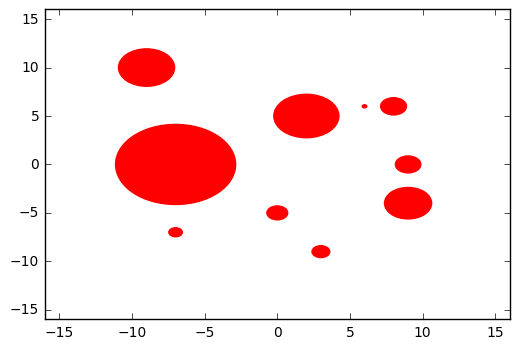

In [7]:
fig, ax = plt.subplots()
limits = maxRadius + maxDis
ax.set_xlim((-limits, limits))
ax.set_ylim((-limits, limits))
for c in s:
    print(c)
    point =(c[0],c[1])
    circle = plt.Circle(point, c[3], color='r')
    ax.add_artist(circle)
 
# circle = plt.Circle((position[0],position[1]), 0.2, color='b')
# ax.add_artist(circle)  


In [8]:
# Saving the objects:
with open('obstacles.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([obstacle, maxRadius, maxDis ], f)